In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
data = pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [4]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
data.duplicated().value_counts()

False    178
dtype: int64

In [6]:
dataa = data.iloc[:,1:]
data_cluster = data.iloc[:,:1]
data_cluster.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [7]:
df = data.iloc[:,1:].values

In [8]:
df_norm = scale(df)
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca = PCA()
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [10]:
var = pca.explained_variance_ratio_
var


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [11]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1


array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [12]:
pca.components_


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [13]:
# variance
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

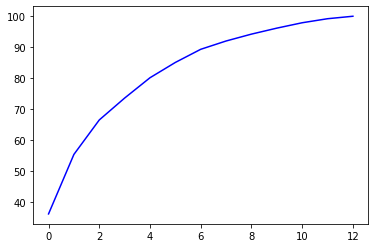

In [14]:
# variance plot for PCA components obtained
plt.plot(var1,color='blue')

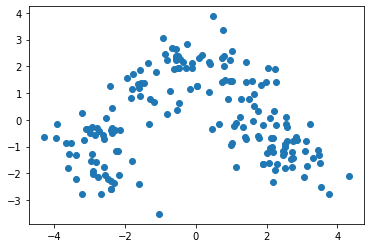

In [15]:
pca_values[:,0:2]
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [16]:
pca_data = pd.DataFrame(pca_values[:,0:3],columns=["pca1","pca2","pca3"])
pca_data

,pca1,pca2,pca3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# ELBOW Curve


Text(0, 0.5, 'wcss')

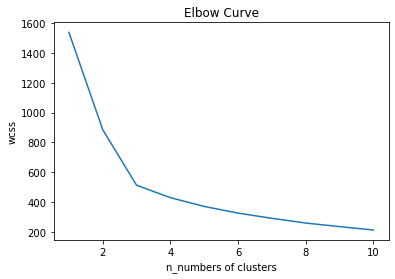

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("n_numbers of clusters")
plt.ylabel("wcss")

# Creating KMeans Model

In [19]:
model = KMeans(n_clusters=3)
model.fit(pca_data)
print(model.labels_)
km = pd.DataFrame(model.labels_,columns=["km_c"])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
df_km = dataa.copy()
df_km["km_c"] = model.labels_
df_km.groupby(df_km.km_c).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
km_c,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125
2,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095


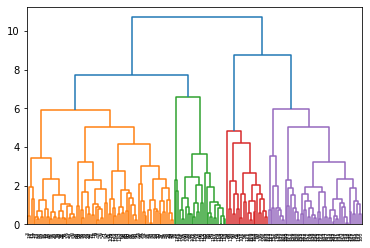

In [21]:
dendrogram = sch.dendrogram(sch.linkage(pca_data,method="complete"))

In [22]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='complete')
df_pred = hc.fit_predict(pca_data)
df_pred
hc = pd.DataFrame(df_pred,columns=["hc"])
hc.head()

,hc
0,0
1,0
2,0
3,0
4,0


In [23]:
df_hc = dataa.copy()
df_hc['hc_Cluster'] = df_pred
df_hc.groupby(df_hc['hc_Cluster']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
hc_Cluster,,,,,,,,,,,,,
0,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


In [24]:
final_clusters = pd.concat([data_cluster,hc,km],axis=1)
final_clusters

,Type,hc,km_c
0,1,0,2
1,1,0,2
2,1,0,2
3,1,0,2
4,1,0,2
...,...,...,...
173,3,1,0
174,3,1,0
175,3,1,0
176,3,1,0
